# Learning Exercise I-B
Find the number of iterations with the largest amplitude when you run the Grover's algorithm with one solution in a database with $N = 2 ^ 7$. As shown above, change the number of iterations and check the amplification. The answer must be an integer.

Hint: Fewer than 15 times. 

In [3]:
# Initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Import basic plot tools
from qiskit.tools.visualization import plot_histogram

backend = BasicAer.get_backend('qasm_simulator')
prob_of_ans = []

for x in range(12):
    database = QuantumRegister(7)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(5) 
    cr = ClassicalRegister(7)
    qc = QuantumCircuit(database, oracle, auxiliary, cr)
    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])


    for j in range(x):
    # oracle_7q
        # search 0111111 
        qc.x(database[0])
        qc.mct(database[:], oracle[0], auxiliary[:], mode='basic') 
        qc.x(database[0])

    # diffusion_7q
        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[6])
        qc.mct(database[0:6], database[6], auxiliary[:], mode='basic')
        qc.h(database[6])
        qc.x(database[:])
        qc.h(database[:])


    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database,cr)
    # Change the endian 
    qc = qc.reverse_bits() 
    
    job = execute(qc, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})
    result = job.result()
    count = result.get_counts()
    answer = count['0111111']
    prob_of_ans.append(answer)
    
    
    
import numpy as np
import matplotlib.pyplot as plt
iteration = [i for i in range(12)]
correct = prob_of_ans
plt.bar(iteration, correct)
plt.xlabel('# of iteration')
plt.ylabel('# of times the solution was obtained')

from qc_grader import grade_ex1b
grade_ex1b(ans)

ModuleNotFoundError: No module named 'qiskit'

In [ ]:
# Change ans of following code and submit it.
# ans must be interger.

from qc_grader import submit_ex1b
submit_ex1b(ans)

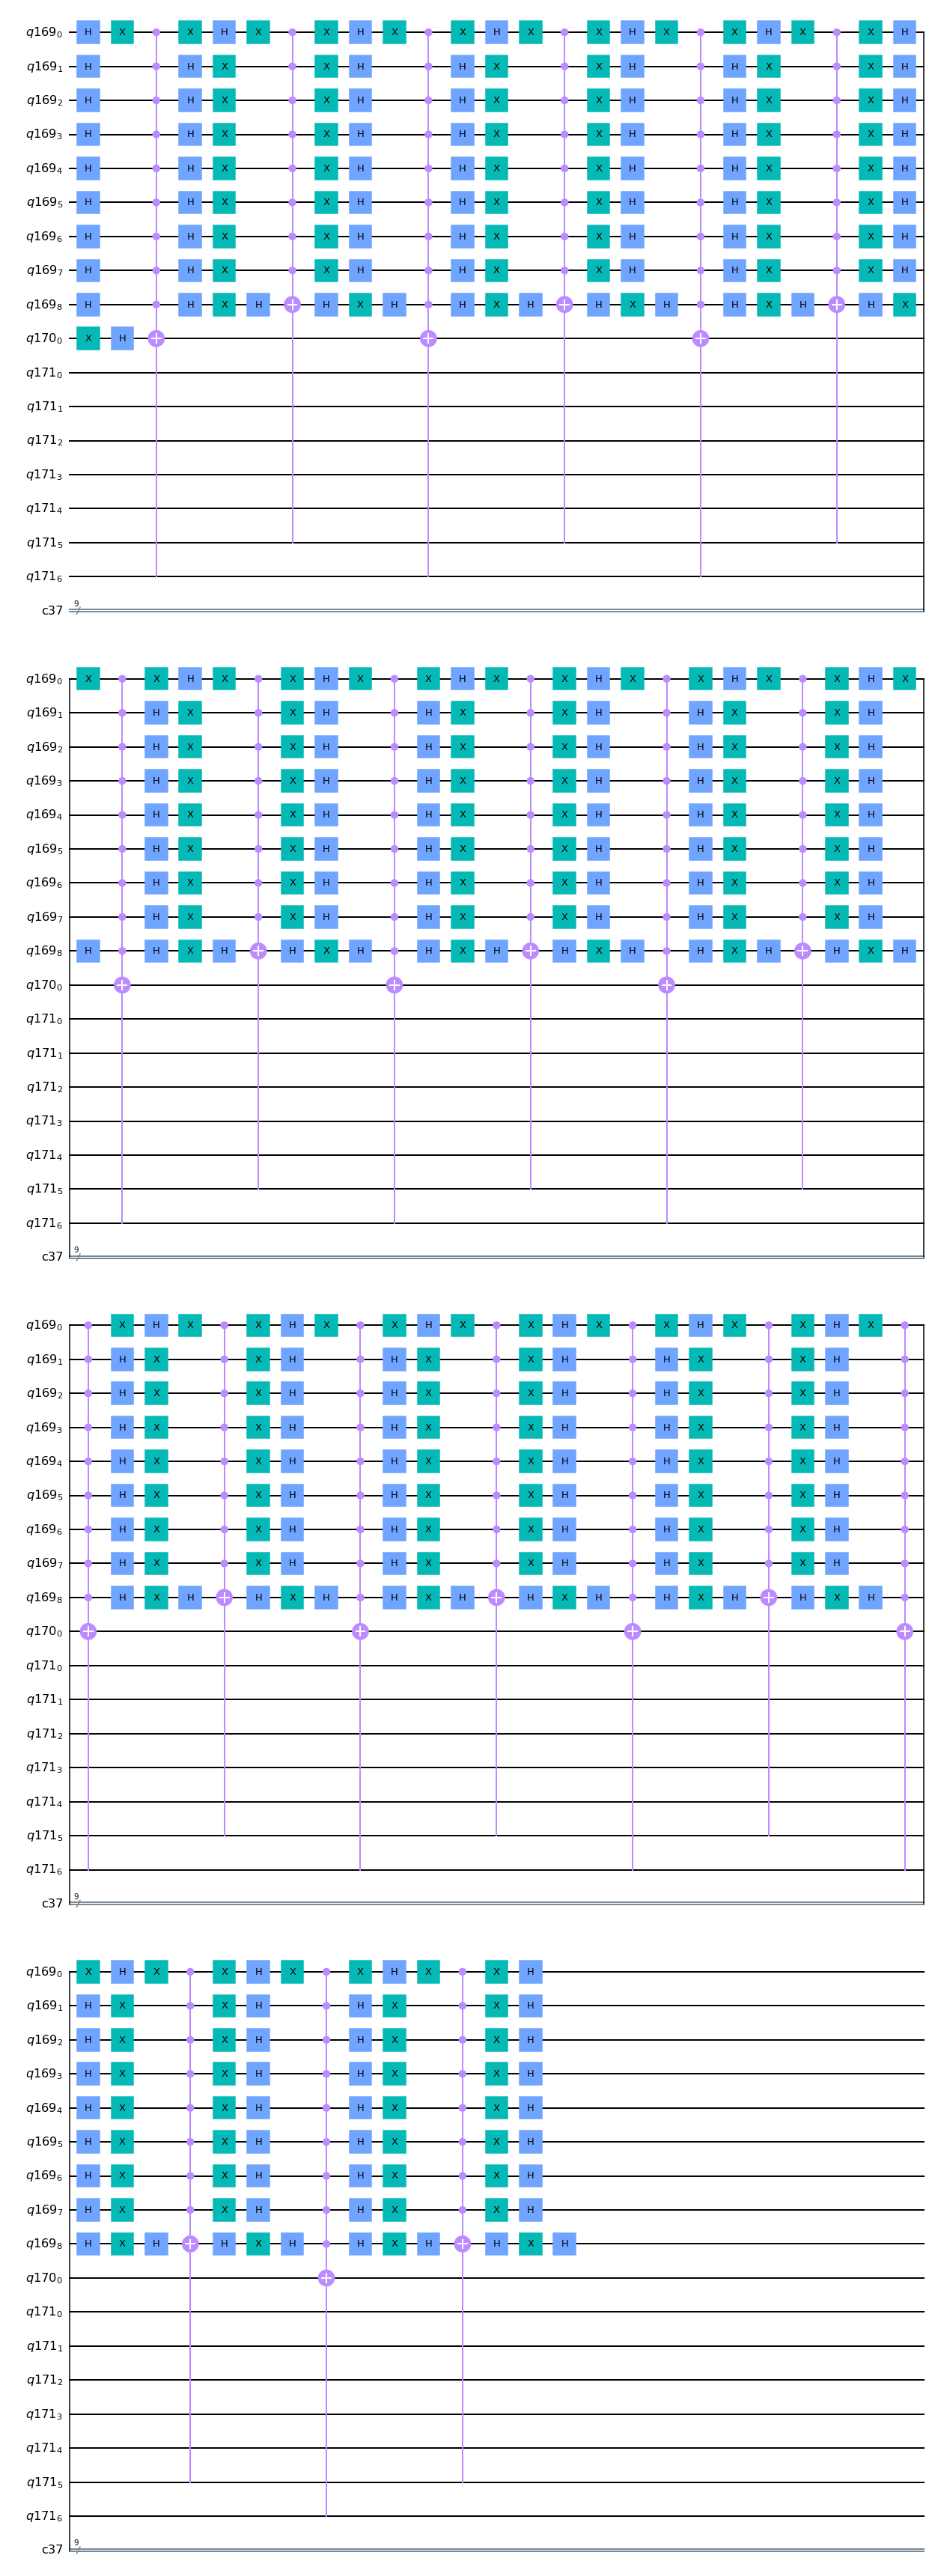

In [4]:
# Initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Import basic plot tools
from qiskit.tools.visualization import plot_histogram

backend = BasicAer.get_backend('qasm_simulator')
prob_of_ans = []

for x in range(12):
    database = QuantumRegister(9)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(7) 
    cr = ClassicalRegister(9)
    qc = QuantumCircuit(database, oracle, auxiliary, cr)
    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])


    for j in range(x):
    # oracle_9q
        # search 1 
        qc.x(database[0])
        qc.mct(database[:], oracle[0], auxiliary[:], mode='basic') 
        qc.x(database[0])

    # diffusion_9q
        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[8])
        qc.mct(database[0:8], database[8], auxiliary[:], mode='basic')
        qc.h(database[8])
        qc.x(database[:])
        qc.h(database[:])

qc.draw()